# NBA 2013 Dataset

- Author: Sanjay S Rao
- LinkenIn: www.linkedin.com/in/sanjay-srinivasa-rao-b67a771a0
- e-mail - sanjay.s.rao04@gmail.com

Data Description


- player - Name of the Player
- pos - The position of the Player
- g - Number of games the Player was in
- gs - Number of the games the Player started
- pts - Total points scored by the Player
- mp - Minutes played
- fg  - Field goals scored
- fga - Field goals attempted
- fg. - Field goals %
- x3p - 3-points field goals made
- x3pa - 3-points field goals attempted
- x3p. - 3-points field goals %
- x2p - 2-points field goals made
- x2pa - 2-points field goals attempted
- x2p. - 2-points field goals %
- efg. - Efficiency
- ft - Free-throws made
- fta - Free-throws attempted
- ft. - Free-throws %
- orb - Offensive rebounds
- drb - Defensice rebounds
- trb - Total rebounds
- ast - Assists
- stl - Steals
- blk - Blocks
- tov - Turnovers
- pf - Personal fouls
- season - Season year
- season_end - End of Season






### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics

### Importing the data

In [2]:
df = pd.read_csv('nba_2013.csv')

In [3]:
df.shape

(481, 31)

In [4]:
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


#### Dropping unnecessary columns, which contains null values

In [5]:
df = df.drop(['x3p.','fg.','x2p.','efg.','ft.'],axis = 1)

In [6]:
df.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
x3p             0
x3pa            0
x2p             0
x2pa            0
ft              0
fta             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

#### Defining a numerical dataset 

In [7]:
data = df
data = data.drop(['player','pos','bref_team_id','season','season_end'],axis = 1)
data.head()

,age,g,gs,mp,fg,fga,x3p,x3pa,x2p,x2pa,...,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,4,15,62,126,...,53,72,144,216,28,23,26,30,122,171
1,20,81,20,1197,93,185,0,0,93,185,...,136,142,190,332,43,40,57,71,203,265
2,27,53,12,961,143,275,0,0,143,275,...,119,102,204,306,38,24,36,39,108,362
3,28,73,73,2552,464,1011,128,300,336,711,...,336,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0,1,136,248,...,67,94,183,277,40,23,46,63,187,328


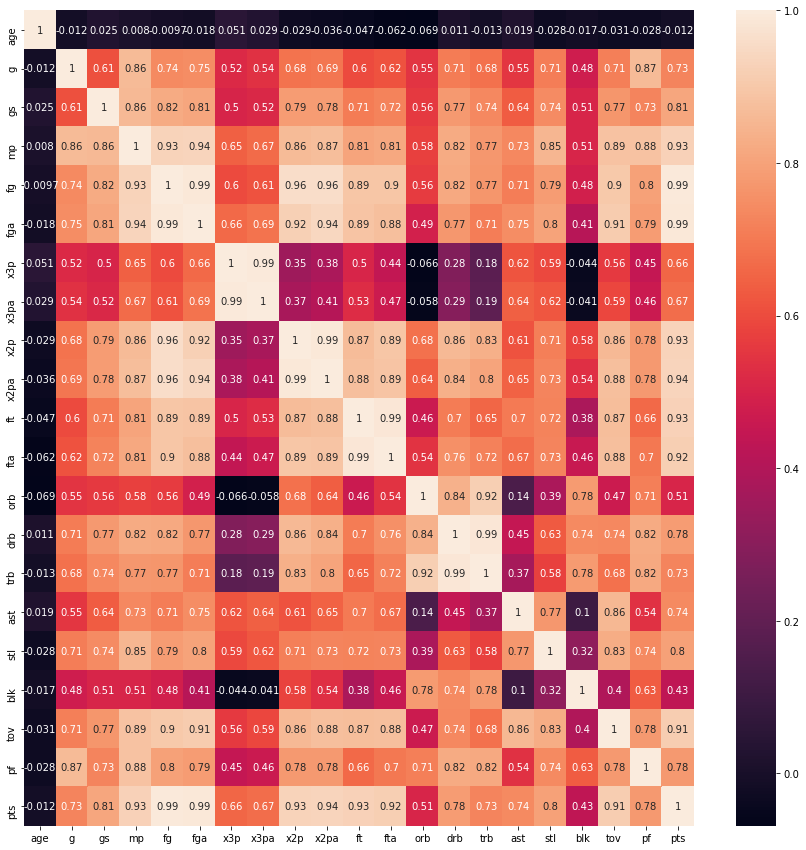

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),annot= True)

The heatmap shows that **gs , mp , fg, fga , x3pa , x2pa , ft , tov** are the variables that are highly correlated against points scored.

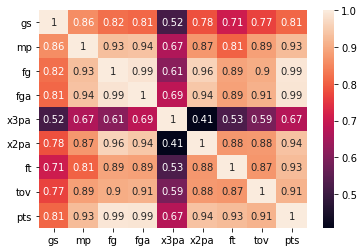

In [9]:
sns.heatmap(data[['gs' , 'mp' , 'fg', 'fga' , 'x3pa' , 'x2pa' , 'ft' , 'tov','pts']].corr(),annot= True) 

We select
- Indpendent variables as **'mp', 'fga', 'x3pa', 'x2pa'** 
- Dependent variable as **'pts'**

#### Defining a new dataset with the selected variables

In [10]:
new = df[['player', 'mp' , 'fga' , 'x3pa' , 'x2pa','pts']]
new.head()

,player,mp,fga,x3pa,x2pa,pts
0,Quincy Acy,847,141,15,126,171
1,Steven Adams,1197,185,0,185,265
2,Jeff Adrien,961,275,0,275,362
3,Arron Afflalo,2552,1011,300,711,1330
4,Alexis Ajinca,951,249,1,248,328


In [11]:
new.describe()

,mp,fga,x3pa,x2pa,pts
count,481.000000,481.000000,481.000000,481.000000,481.000000
mean,1237.386694,424.463617,110.130977,314.332640,516.582121
std,897.258840,368.850833,132.751732,294.174554,470.422228
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,388.000000,110.000000,3.000000,67.000000,115.000000
50%,1141.000000,332.000000,48.000000,227.000000,401.000000
75%,2016.000000,672.000000,193.000000,459.000000,821.000000
max,3122.000000,1688.000000,615.000000,1408.000000,2593.000000


In [12]:
#getting the dummy variables for the Player column
dummies = pd.get_dummies(new.player)
dummies.head(3)

,A.J. Price,Aaron Brooks,Aaron Gray,Adonis Thomas,Al Harrington,Al Horford,Al Jefferson,Al-Farouq Aminu,Alan Anderson,Alec Burks,...,Wayne Ellington,Wesley Johnson,Wesley Matthews,Will Barton,Will Bynum,Willie Green,Wilson Chandler,Xavier Henry,Zach Randolph,Zaza Pachulia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data1 = pd.concat([dummies,new],axis = 1)
data1.head()

,A.J. Price,Aaron Brooks,Aaron Gray,Adonis Thomas,Al Harrington,Al Horford,Al Jefferson,Al-Farouq Aminu,Alan Anderson,Alec Burks,...,Wilson Chandler,Xavier Henry,Zach Randolph,Zaza Pachulia,player,mp,fga,x3pa,x2pa,pts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Quincy Acy,847,141,15,126,171
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Steven Adams,1197,185,0,185,265
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Jeff Adrien,961,275,0,275,362
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Arron Afflalo,2552,1011,300,711,1330
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,Alexis Ajinca,951,249,1,248,328


In [14]:
#dropping the player column as we have dummies instead of it now
data1.drop(['player'],axis = 1,inplace =True)

In [15]:
X = data1.drop(['pts'],axis = 1) #independent variables
y = data1['pts'] #dependent/target variable

### Train-Test Spilt

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 100)

In [17]:
#adding a new axis to the target data
y_test = y_test[:,np.newaxis]
y_train = y_train[:,np.newaxis]

<ipython-input-17-81491c4e6c4f>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test = y_test[:,np.newaxis]
<ipython-input-17-81491c4e6c4f>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train = y_train[:,np.newaxis]


### KNN Regressor

#### To find the optimal value for k

In [18]:
#import required packages
from sklearn.metrics import mean_squared_error 
from math import sqrt

##### Using RMSE

In [19]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K,weights='distance', n_jobs=-1)

    model.fit(X_train,y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 114.13683233227283
RMSE value for k=  2 is: 96.00179304525062
RMSE value for k=  3 is: 81.2251558670239
RMSE value for k=  4 is: 69.58144947657743
RMSE value for k=  5 is: 65.68598659731451
RMSE value for k=  6 is: 66.42587646187387
RMSE value for k=  7 is: 64.37072440536588
RMSE value for k=  8 is: 64.25616925187151
RMSE value for k=  9 is: 62.37855760325464
RMSE value for k=  10 is: 62.633217889390835
RMSE value for k=  11 is: 62.297718521361745
RMSE value for k=  12 is: 62.834557628075615
RMSE value for k=  13 is: 62.456519703081646
RMSE value for k=  14 is: 62.293260997323316
RMSE value for k=  15 is: 60.73264205146771
RMSE value for k=  16 is: 61.297493989112205
RMSE value for k=  17 is: 59.687460960724216
RMSE value for k=  18 is: 58.13575282800896
RMSE value for k=  19 is: 58.973151595154356
RMSE value for k=  20 is: 59.65298789363004


##### Elbow curve

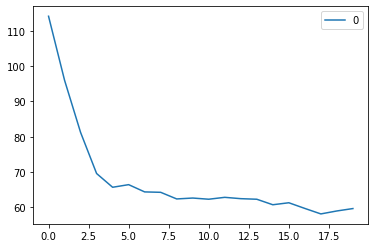

In [20]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

#####Using GridSearhCV

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 7}

#### Modelling

In [ ]:
knn_r = KNeighborsRegressor(n_neighbors=7,weights='distance', n_jobs=-1)

In [ ]:
knn_r.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=7, weights='distance')

In [ ]:
knn_r.score(X_test,y_test)

0.9763987714923393

We find that out model performs well, with 97.63% accuracy score on the Test data provided to the model.

In [ ]:
y_pred = knn_r.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9763987714923393

### Plotting the results

Text(0.5, 1.0, 'Actual vs Predicted')

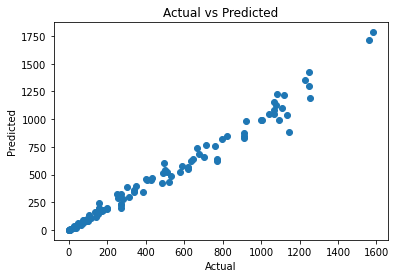

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

We can see that there is minimum deviation between the actual and predicted values.